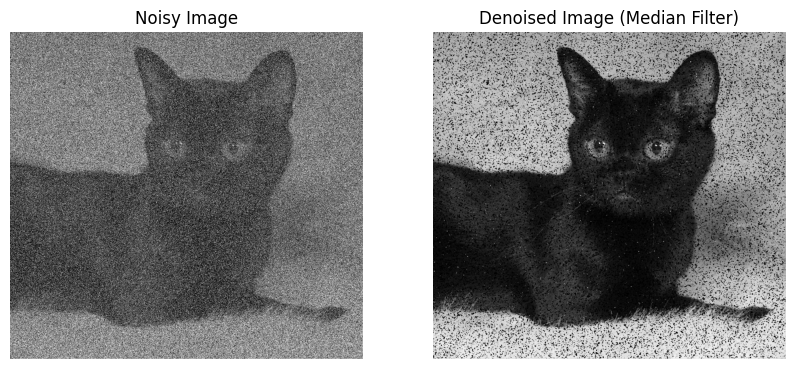

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image_path = "/kaggle/input/noised-picture/474703737_1125578818805805_5564654729724110790_n.png"
noisy_image = cv2.imread(image_path)

# Convert the image to grayscale if necessary (for single-channel processing)
# noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

# Apply Median Filtering to remove salt-and-pepper noise
denoised_image = cv2.medianBlur(noisy_image, 5)  # You can change the kernel size (5) for stronger or weaker filtering

# Display the results
plt.figure(figsize=(10, 5))

# Original Noisy Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# Denoised Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (Median Filter)")
plt.axis("off")

plt.show()


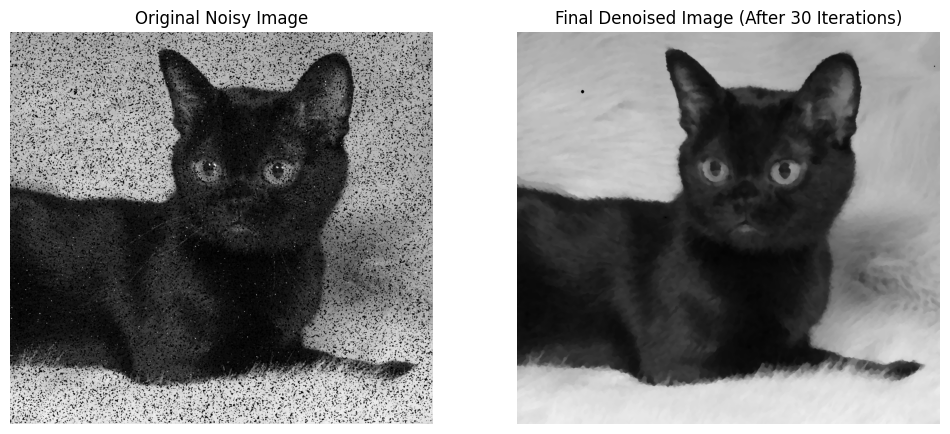

/kaggle/working/final_denoised_image.png

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import FileLink, display

# Path to your image (replace with actual path)
image_path = "/kaggle/working/denoised_image.png"

# Load the noisy image
noisy_image = cv2.imread(image_path)

# Store the original noisy image for display
original_image = noisy_image.copy()

# Loop to apply median filtering multiple times
for i in range(30):
    denoised_image = cv2.medianBlur(noisy_image, 5)
    noisy_image = denoised_image  # Update the input for the next iteration

# Save the final denoised image
final_output_path = "/kaggle/working/final_denoised_image.png"
cv2.imwrite(final_output_path, denoised_image)

# Display first (original) and last (denoised) images
plt.figure(figsize=(12, 6))

# Original Noisy Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Noisy Image")
plt.axis("off")

# Final Denoised Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title("Final Denoised Image (After 30 Iterations)")
plt.axis("off")

plt.show()

# Provide a download link for the final denoised image
display(FileLink(final_output_path))


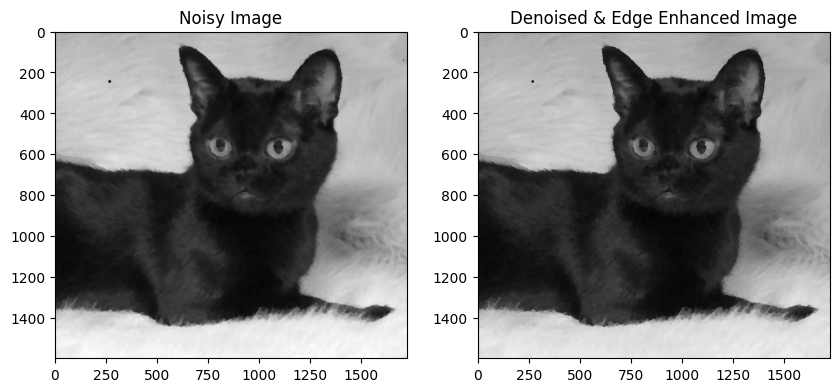

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Path for noisy image
img_path = '/kaggle/working/final_denoised_image.png'
noisy_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply Denoising (assumed to be done)
denoised_image = noisy_image

# Enhance the edges by applying unsharp masking
def enhance_edges(image, strength=1.5, kernel_size=5):
    # Apply Gaussian blur to create a blurred version of the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    
    # Subtract the blurred image from the original image to get the edge details
    sharpened = cv2.addWeighted(image, 1 + strength, blurred_image, -strength, 0)
    
    return sharpened

# Loop over the image and enhance edges iteratively
for _ in range(2):  # Loop for iterative sharpening (adjust loop count for more effect)
    denoised_image = enhance_edges(denoised_image, strength=1.5, kernel_size=5)

# Save the final denoised image with enhanced edges
cv2.imwrite('/kaggle/working/denoise_image_with_edges.png', denoised_image)

# Display the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Denoised & Edge Enhanced Image')
plt.imshow(denoised_image, cmap='gray')
plt.show()